In [1]:
%load_ext lab_black
import pandas as pd
import json
import requests
import numpy as np
from config import weather_api_key
from config import g_key
from citipy import citipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Part I : WeatherPy
----


## Generate Cities List

In [2]:
lat_range = (90, -90)
lon_range = (180, -180)

# Blank list to hold latitude and longitude values
lat_lon = []

# Using numpy to generate random latitude and longitude values
lat = np.random.uniform(high=90, low=-90, size=1400)
lon = np.random.uniform(high=180, low=-180, size=1400)
lat_lon = list(zip(lat, lon))

# Using "for" loop to generate city list.
city_list = []

for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    # Appending only non-duplicated names to the city list.
    if city not in city_list:
        city_list.append(city)

In [3]:
len(city_list)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
def extract_data(data):
    return {
        "City": data["name"],
        "Lat": data["coord"]["lat"],
        "Lon": data["coord"]["lon"],
        "Max Temp": data["main"]["temp_max"],
        "Humidity": data["main"]["humidity"],
        "Cloudiness": data["clouds"]["all"],
        "Wind Speed": data["wind"]["speed"],
        "Country": data["sys"]["country"],
        "Date": data["dt"],
    }

In [5]:
city_results = []

# Record counter starts at 1
processing_record = 1

print("Beginning Data Retrieval")
print("----------------------------------------")

for i, city in enumerate(city_list):

    try:

        data = requests.get(
            "http://api.openweathermap.org/data/2.5/weather",
            params={"q": city, "appid": weather_api_key, "units": "imperial"},
        ).json()

        city_result = extract_data(data)
        city_results.append(city_result)

        print(f"Processing Record {processing_record} | {city}")

        processing_record += 1

    except:
        print("City not found. Skipping...")
    continue

print("----------------------------------------")
print("Data Retrieval Complete")
print("----------------------------------------")

Beginning Data Retrieval
----------------------------------------
Processing Record 1 | gulu
Processing Record 2 | atuona
Processing Record 3 | rikitea
Processing Record 4 | hilo
Processing Record 5 | pacific grove
Processing Record 6 | saldanha
City not found. Skipping...
Processing Record 7 | priladozhskiy
Processing Record 8 | jamestown
Processing Record 9 | urzhum
Processing Record 10 | ostrovnoy
Processing Record 11 | kalmunai
Processing Record 12 | cape town
Processing Record 13 | qaanaaq
Processing Record 14 | lodja
Processing Record 15 | saint-pierre
Processing Record 16 | lebu
Processing Record 17 | ponta do sol
Processing Record 18 | mataura
Processing Record 19 | albany
Processing Record 20 | galeana
Processing Record 21 | torbay
Processing Record 22 | susanville
Processing Record 23 | san angelo
Processing Record 24 | jiangyou
Processing Record 25 | port alfred
Processing Record 26 | cherskiy
Processing Record 27 | bingol
Processing Record 28 | shellbrook
Processing Record 

In [6]:
df = pd.DataFrame(city_results)
df.head(2)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gulu,2.77,32.30,65.25,96,75,1.61,UG,1601095690
1,Atuona,-9.80,-139.03,78.12,74,6,18.25,PF,1601095690


### Creating Scatter Plot to showcase the relation ship between Max Temperature and Latitude

In [7]:
# Converting data in DataFrame so that it can be used to define the X and y value needed for the scatter plot.
X = df["Lat"].values
y = df["Max Temp"].values

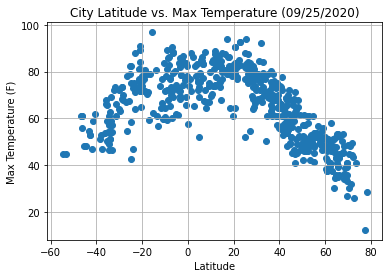

In [8]:
plt.title("City Latitude vs. Max Temperature (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X, y)
plt.show
plt.savefig("max_temp_latitude.png")

Here we are examining the relationship between a city's latitude and it's maximum temperature. As you can see, as a city's latitude has a clear relationship to it's max temperature as we would expect. Temperatures appear to be higher the closer they are to the equator, (0) degrees latitude.

### Creating Scatter Plot to showcase the relationship between Humidity and Latitude 

In [9]:
X = df["Lat"].values
y = df["Humidity"].values

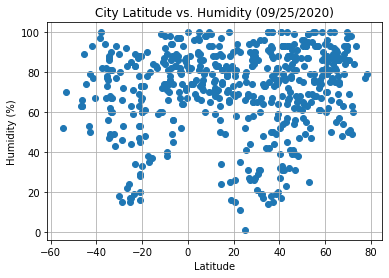

In [10]:
plt.title("City Latitude vs. Humidity (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(X, y)
plt.show
plt.savefig("humidity_latitude.png")

This scatter plot is displaying the relationship between a city's latitude and it's humidity levels. There does not appear to be a clear relationship between cities with higher humidities and their latitude based on the plot. However, there does appear to be a slight indication that many cities that lie between around -40 degrees and 40 degrees latitude have lower humidity levels.

### Creating Scatter Plot to showcase the relationship between Cloudiness and Latitude 

In [11]:
X = df["Lat"].values
y = df["Cloudiness"].values

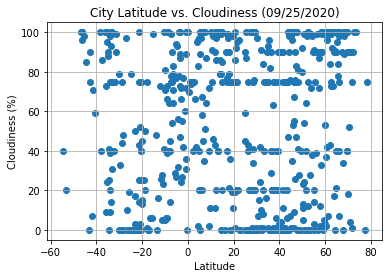

In [12]:
plt.title("City Latitude vs. Cloudiness (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(X, y)
plt.show
plt.savefig("cloudiness_latitude.png")

This scatter plot showcases the relationship between a cities latitude and its cloud cover. Latitude does not appear to be a major impactor of a city's cloud cover. Cities with high, medium and low cloud cover appear to be evenly distributed across all latitudes.

### Creating Scatter Plot to showcase the relationship between Wind Speed and Latitude 

In [13]:
X = df["Lat"].values
y = df["Wind Speed"].values

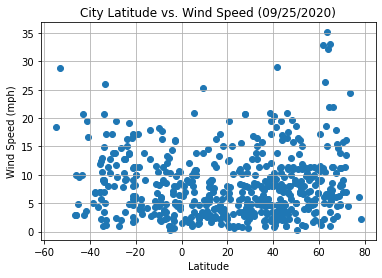

In [14]:
plt.title("City Latitude vs. Wind Speed (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(X, y)
plt.show
plt.savefig("wind_speed_latitude.png")

With this plot, we can see that there is perhaps a small relationship between a city's latitude and it wind speed. Although wind speed does appear to be rather equally distibuted, we do see that cities further away from the equator have the potential for higher wind speeds, especially in the Northern hemisphere.

## Linear Regression

### Temperature (F) vs. Latitude (Northern and Southern Hemisphere)

#### (Northern Hemisphere)

In [15]:
# Created dataframe to display only those cities located in the Northern Hemisphere
NH_df = df[df.Lat > 0]

In [16]:
# Converting the NH_df data so that it can be used to create scatter plots andn perform linear regression.
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Max Temp"].values

In [17]:
# Setting up linear regression model.
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [18]:
slope = model.coef_[0]
slope

-0.6784865901093537

In [19]:
intercept = model.intercept_
intercept

89.54112563780373

In [20]:
r_squared = model.score(X_array, y)
r_squared

0.7132592526209467

In [21]:
def predict_function(max_temp):
    return model.predict([[max_temp]])[0]

In [22]:
nh_max_temp_range = np.arange(min(X), max(X), 0.001)
nh_predict_max_temp = [predict_function(e) for e in nh_max_temp_range]

In [23]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

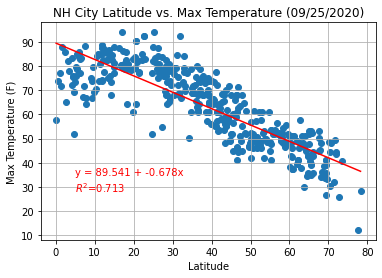

In [24]:
plt.title("NH City Latitude vs. Max Temperature (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X, y)
plt.plot(nh_max_temp_range, nh_predict_max_temp, color="red")
plt.text(5, 35, formula, color="red")
plt.text(5, 28, r_squared_str, color="red")
plt.show
plt.savefig("nh_max_temp_latitude_lr.png")

As you can see, the r squared value for this regression anaylis is quite high. This indicates that there is a strong correlation between latitude and the maximum temperatures. This is easily seen on the plot displayed above. The further you get away from the equator (0), the lower the max temperature.

#### (Southern Hemisphere)

In [25]:
# Created dataframe to display only those cities located in the Northern Hemisphere
SH_df = df[df.Lat < 0]

In [26]:
# Converting the SH_df data so that it can be used to create scatter plots andn perform linear regression.
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Max Temp"].values

In [27]:
# Setting up linear regression model.
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [28]:
slope = model.coef_[0]
slope

0.5580129695742775

In [29]:
intercept = model.intercept_
intercept

80.500611894821

In [30]:
r_squared = model.score(X_array, y)
r_squared

0.4072744439754754

In [31]:
def predict_function(max_temp):
    return model.predict([[max_temp]])[0]

In [32]:
sh_max_temp_range = np.arange(min(X), max(X), 0.001)
sh_predict_max_temp = [predict_function(e) for e in sh_max_temp_range]

In [33]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

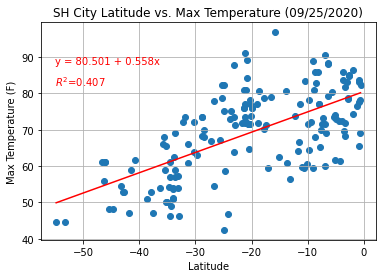

In [34]:
plt.title("SH City Latitude vs. Max Temperature (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X, y)
plt.plot(sh_max_temp_range, sh_predict_max_temp, color="red")
plt.text(-55, 88, formula, color="red")
plt.text(-55, 82, r_squared_str, color="red")
plt.show
plt.savefig("sh_max_temp_latitude_lr.png")

The r squared value for this linear regression is also quite high; although not quite as high as what was indicated in the Northern Hemisphere. Again, there is a strong correlation between latitude and maximum temperature in the Southern Hemisphere as well. This is easily explained by the fact that Earth is round, and as you get further and further away from the equator in both hemispheres, less of the sun's light makes it to the surface causing maximum temperatures to be lower. Yet another notch against the "Flat Earthers" out there.

### Humidity (%) vs. Latitude (Northern and Southern Hemisphere)¶

#### (Northern Hemisphere)

In [35]:
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Humidity"].values

In [36]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [37]:
slope = model.coef_[0]
slope

0.06815331723981469

In [38]:
intercept = model.intercept_
intercept

69.59279182474413

In [39]:
r_squared = model.score(X_array, y)
r_squared

0.00397748730164893

In [40]:
def predict_function(humidity):
    return model.predict([[humidity]])[0]

In [41]:
nh_humidity_range = np.arange(min(X), max(X), 0.001)
nh_predict_humidity = [predict_function(e) for e in nh_humidity_range]

In [42]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

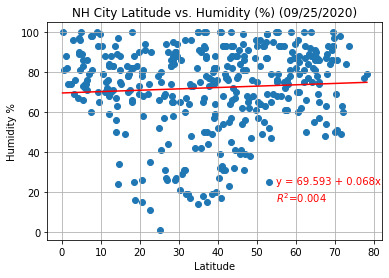

In [43]:
plt.title("NH City Latitude vs. Humidity (%) (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.scatter(X, y)
plt.plot(nh_humidity_range, nh_predict_humidity, color="red")
plt.text(55, 24, formula, color="red")
plt.text(55, 15, r_squared_str, color="red")
plt.show
plt.savefig("nh_humidity_latitude_lr.png")

The r squared value for this linear regression is quite low suggesting that there is little correlation between latitude and humidity levels. However, as I mentioned above, one can still see there is still something going on here. Although humidity levels due appear to be dispearsed throughout, you can still see that most of the lower humidity levels are grouped together between about 10 and 35 degrees latitude.

#### (Southern Hemisphere)

In [44]:
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Humidity"].values

In [45]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [46]:
slope = model.coef_[0]
slope

0.2895608436998823

In [47]:
intercept = model.intercept_
intercept

74.71749194720579

In [48]:
r_squared = model.score(X_array, y)
r_squared

0.034491859690833016

In [49]:
def predict_function(humidity):
    return model.predict([[humidity]])[0]

In [50]:
sh_humidity_range = np.arange(min(X), max(X), 0.001)
sh_predict_humidity = [predict_function(e) for e in sh_humidity_range]

In [51]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

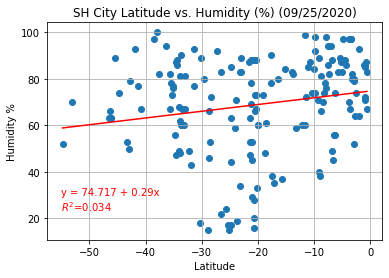

In [52]:
plt.title("SH City Latitude vs. Humidity (%) (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.scatter(X, y)
plt.plot(sh_humidity_range, sh_predict_humidity, color="red")
plt.text(-55, 30, formula, color="red")
plt.text(-55, 23, r_squared_str, color="red")
plt.show
plt.savefig("sh_humidity_latitude_lr.png")

The same is true for the Southern Hemisphere. The r squared value for this linear regression is also low suggesting that there is little correlation between latitude and humidity levels. Again; however, we do see there is still something going on with lower humidity levels. Although humidity levels as whole due appear to be dispearsed throughout, you can still see that most of the lower humidit levels are grouped together between about -30 and -10 degrees latitude. One would assume that most deserts are located at this latitudal levels all over the planet.

### Cloudiness (%) vs. Latitude (Northern and Southern Hemisphere)¶

#### (Northern Hemisphere)

In [53]:
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Cloudiness"].values

In [54]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [55]:
slope = model.coef_[0]
slope

0.05414232266132147

In [56]:
intercept = model.intercept_
intercept

51.122683715092705

In [57]:
r_squared = model.score(X_array, y)
r_squared

0.0007434456177787263

In [58]:
def predict_function(cloudiness):
    return model.predict([[cloudiness]])[0]

In [59]:
nh_cloudiness_range = np.arange(min(X), max(X), 0.001)
nh_predict_cloudiness = [predict_function(e) for e in nh_cloudiness_range]

In [60]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

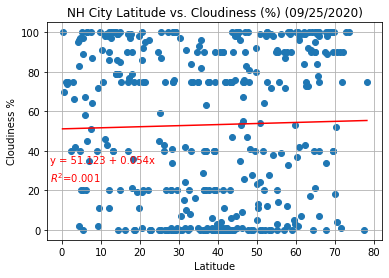

In [61]:
plt.title("NH City Latitude vs. Cloudiness (%) (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.scatter(X, y)
plt.plot(nh_cloudiness_range, nh_predict_cloudiness, color="red")
plt.text(-3, 34, formula, color="red")
plt.text(-3, 24, r_squared_str, color="red")
plt.show
plt.savefig("nh_cloudiness_latitude_lr.png")

The R squared value for this linear regression is the lowest we've seen so far. There is apparently little to know correlation betwen cloudiness and latitude in the Northern Hemisphere.

#### (Southern Hemisphere)

In [62]:
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Cloudiness"].values

In [63]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [64]:
slope = model.coef_[0]
slope

0.011202534884188216

In [65]:
intercept = model.intercept_
intercept

49.22216614039338

In [66]:
r_squared = model.score(X_array, y)
r_squared

1.7313267260066212e-05

In [67]:
def predict_function(cloudiness):
    return model.predict([[cloudiness]])[0]

In [68]:
sh_cloudiness_range = np.arange(min(X), max(X), 0.001)
sh_predict_cloudiness = [predict_function(e) for e in sh_cloudiness_range]

In [69]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

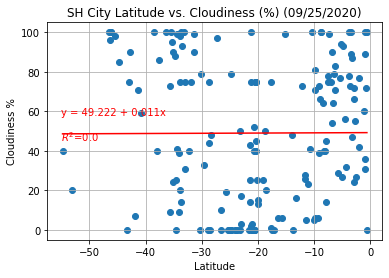

In [70]:
plt.title("SH City Latitude vs. Cloudiness (%) (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.scatter(X, y)
plt.plot(sh_cloudiness_range, sh_predict_cloudiness, color="red")
plt.text(-55, 58, formula, color="red")
plt.text(-55, 45, r_squared_str, color="red")
plt.show
plt.savefig("sh_cloudiness_latitude_lr.png")

The R squared value for this linear regression is also very low. Again, there is apparently little to know correlation betwen cloudiness and latitude in the Southern Hemisphere as well.

### Wind Speed (mph) vs. Latitude (Northern and Southern Hemisphere)¶

#### (Northern Hemisphere)

In [71]:
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Wind Speed"].values

In [72]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [73]:
slope = model.coef_[0]
slope

0.05680457045198766

In [74]:
intercept = model.intercept_
intercept

5.822779410812

In [75]:
r_squared = model.score(X_array, y)
r_squared

0.037502740798130096

In [76]:
def predict_function(wind_speed):
    return model.predict([[wind_speed]])[0]

In [77]:
nh_wind_speed_range = np.arange(min(X), max(X), 0.001)
nh_predict_wind_speed_range = [predict_function(e) for e in nh_wind_speed_range]

In [78]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

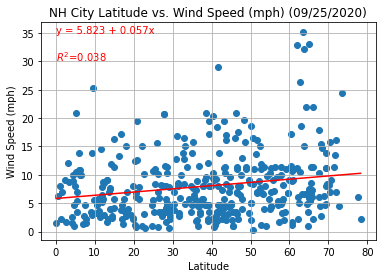

In [79]:
plt.title("NH City Latitude vs. Wind Speed (mph) (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(X, y)
plt.plot(nh_wind_speed_range, nh_predict_wind_speed_range, color="red")
plt.text(0, 35, formula, color="red")
plt.text(0, 30, r_squared_str, color="red")
plt.show
plt.savefig("nh_wind_speed_latitude_lr.png")

The data points here are quite spread out, and the R Squared value is low. This indicates that there is little to know correlation between latitude and wind speed. However, much like humidity, there are some data points that are of interest. You can see that there are a couple of cities located far to the north report far higher wind speeds than others in this group.

#### (Southern Hemisphere)

In [80]:
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Wind Speed"].values

In [81]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [82]:
slope = model.coef_[0]
slope

-0.09865715024056847

In [83]:
intercept = model.intercept_
intercept

6.659076094009375

In [84]:
r_squared = model.score(X_array, y)
r_squared

0.05773177284487052

In [85]:
def predict_function(wind_speed):
    return model.predict([[wind_speed]])[0]

In [86]:
sh_wind_speed_range = np.arange(min(X), max(X), 0.001)
sh_predict_wind_speed_range = [predict_function(e) for e in sh_wind_speed_range]

In [87]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

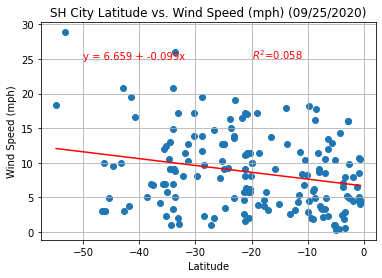

In [88]:
plt.title("SH City Latitude vs. Wind Speed (mph) (09/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(X, y)
plt.plot(sh_wind_speed_range, sh_predict_wind_speed_range, color="red")
plt.text(-50, 25, formula, color="red")
plt.text(-20, 25, r_squared_str, color="red")
plt.show
plt.savefig("sh_wind_speed_latitude_lr.png")

Although the R Squared value is very low, one can see a small trend. you can also see that like in the Northern Hemisphere there are some data anomalies that require further analysis.